# Data exploration

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [25]:
data_X = pd.read_csv("../raw_data/games_infos.csv")
data_X.head()

,App_ID,Name,Release_Date,Estimated_Owners,Peak_CCU,Required_Age,Price,DLC_Count,About_The_Game,Supported_Languages,...,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,32400,"STAR WARS™ Dark Forces (Classic, 1995)","16 Sep, 2009",500000 - 1000000,6,0,5.89,NaN,Purchase STAR WARS ™ Dark Forces Remaster Bund...,"['English', 'French', 'German', 'Italian', 'Sp...",...,0,52,0,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,"FPS,Action,Classic,Sci-fi,Shooter,Retro,First-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,2060170,Solas City Heroes,"25 Apr, 2023",0 - 20000,16,0,16.79,1.0,A Superhero Beat em’ up with a kinky twist! So...,['English'],...,0,0,0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1947530,Fidget Spinner RPG,"26 Sep, 2023",20000 - 50000,2,0,3.99,NaN,"Spin, craft, upgrade, and violate the laws of ...",['English'],...,0,0,0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Casual,RPG,Clicker,Family Friendly,Crafting,Id...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,2020480,魔導聖戰:風色幻想,"8 Aug, 2022",50000 - 100000,2,0,1.59,NaN,游戏玩法 全新的『徽章转职系统』搭载，近百种职业任君挑选 可自由组合角色特技的『徽章特技系统...,['Traditional Chinese'],...,0,0,0,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy","Adventure,Strategy,RPG,Turn-Based Strategy,Boa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1771430,Maid for Pleasure,"10 Dec, 2021",0 - 20000,1,0,5.99,NaN,Your family fortune is kaput and all you're le...,"['English', 'Spanish - Spain', 'Spanish - Lati...",...,0,0,0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN


In [26]:
data_Y = pd.read_csv("../raw_data/player_history.csv")
data_Y.head()

,App_ID,Month,Avg. Players,Peak Players
0,32400,Last 30 Days,7.92,27.0
1,32400,February 2024,6.67,19.0
2,32400,January 2024,7.33,23.0
3,32400,December 2023,6.85,24.0
4,32400,November 2023,5.17,18.0


In [27]:
data_Y = data_Y[data_Y['Month'] != 'Last 30 Days']
data_Y['Month'] = pd.to_datetime(data_Y['Month'])

/tmp/ipykernel_61720/2216463864.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_Y['Month'] = pd.to_datetime(data_Y['Month'])


In [28]:
#data_Y['Month'] = data_Y['Month'].apply(lambda x: datetime.strptime(x, '%B %Y').strftime('%m-%y'))
data_Y['Month'] = pd.to_datetime(data_Y['Month'])
#data_Y.iloc[1,1].year

In [29]:
data_Y

,App_ID,Month,Avg. Players,Peak Players
1,32400,2024-02-01,6.67,19.0
2,32400,2024-01-01,7.33,23.0
3,32400,2023-12-01,6.85,24.0
4,32400,2023-11-01,5.17,18.0
5,32400,2023-10-01,6.04,17.0
...,...,...,...,...
801266,278970,2015-10-01,29.24,125.0
801267,278970,2015-09-01,57.97,169.0
801268,278970,2015-08-01,106.67,230.0
801269,278970,2015-07-01,174.36,418.0


## Features selection

In [30]:
data_X.describe()

,App_ID,Peak_CCU,Required_Age,Price,DLC_Count,Metacritic_Score,User_Score,Positive,Negative,Score_Rank,Achievements,Recommendations,Average_Playtime_Forever,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks
count,2.235800e+04,22358.000000,22358.000000,20086.000000,5937.000000,2731.000000,22358.000000,2.235800e+04,22358.000000,13.000000,13904.000000,1.019700e+04,22358.000000,22358.000000,22358.000000,22358.000000
mean,1.201262e+06,315.840505,0.467618,11.357000,5.491831,75.121933,0.045085,4.427976e+03,689.227167,99.153846,45.973317,7.617909e+03,402.772207,20.657841,326.155068,22.485106
std,7.133382e+05,8549.494050,2.767763,13.348413,50.561696,9.597435,1.912785,5.786425e+04,10804.013721,0.800641,225.945446,5.848763e+04,4516.298265,273.848844,6197.730722,319.236669
min,1.000000e+01,0.000000,0.000000,0.490000,1.000000,20.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,1.010000e+02,0.000000,0.000000,0.000000,0.000000
25%,5.945550e+05,0.000000,0.000000,3.990000,1.000000,70.000000,0.000000,9.000000e+00,2.000000,99.000000,13.000000,2.720000e+02,0.000000,0.000000,0.000000,0.000000
50%,1.134110e+06,1.000000,0.000000,7.990000,1.000000,76.000000,0.000000,8.300000e+01,19.000000,99.000000,25.000000,7.490000e+02,0.000000,0.000000,0.000000,0.000000
75%,1.734592e+06,9.000000,0.000000,14.990000,3.000000,81.000000,0.000000,7.430000e+02,144.000000,100.000000,43.000000,2.731000e+03,148.000000,0.000000,127.000000,0.000000
max,2.850400e+06,994765.000000,20.000000,249.900000,2904.000000,97.000000,100.000000,6.935584e+06,995340.000000,100.000000,9821.000000,4.062727e+06,559258.000000,19596.000000,838881.000000,19596.000000


In [31]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22358 entries, 0 to 22357
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   App_ID                    22358 non-null  int64  
 1   Name                      22358 non-null  object 
 2   Release_Date              22358 non-null  object 
 3   Estimated_Owners          22358 non-null  object 
 4   Peak_CCU                  22358 non-null  int64  
 5   Required_Age              22358 non-null  int64  
 6   Price                     20086 non-null  float64
 7   DLC_Count                 5937 non-null   float64
 8   About_The_Game            22322 non-null  object 
 9   Supported_Languages       22358 non-null  object 
 10  Full_Audio_Languages      22358 non-null  object 
 11  Reviews                   4369 non-null   object 
 12  Header_Image              22358 non-null  object 
 13  Website                   12871 non-null  object 
 14  Suppor

In [32]:
data_X.nunique()

App_ID                      22358
Name                        22294
Release_Date                 3924
Estimated_Owners               14
Peak_CCU                     1121
Required_Age                   13
Price                         712
DLC_Count                      96
About_The_Game              22253
Supported_Languages          6233
Full_Audio_Languages         1358
Reviews                      4350
Header_Image                22336
Website                     11161
Support_URL                  8848
Support_Email               12216
Windows                         2
Mac                             2
Linux                           2
Metacritic_Score               66
Metacritic_URL               2702
User_Score                     12
Positive                     4756
Negative                     2383
Score_Rank                      3
Achievements                  313
Recommendations              4333
Notes                        3384
Average_Playtime_Forever     2198
Average_Playti

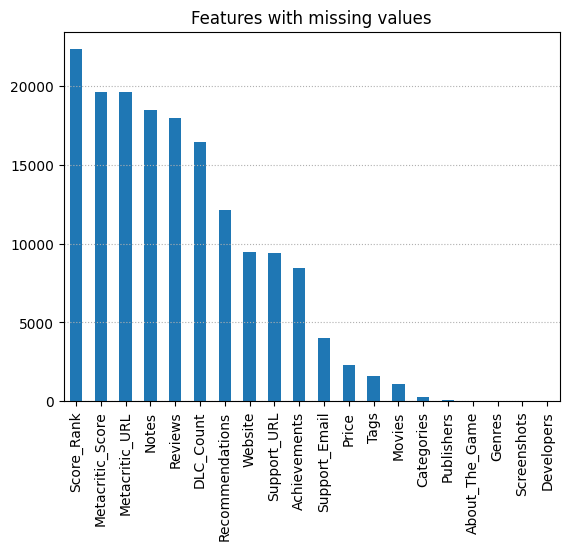

In [33]:
# MISSING VALUES
missing_mask = data_X.isna().sum() > 0
missing_values = data_X.isna().sum().sort_values(ascending=False)
missing_values = missing_values[missing_mask]
missing_values.plot(kind="bar")

plt.grid(axis="y", linestyle=":")
plt.title("Features with missing values")
plt.show();

In [34]:
data_X.Genres.nunique()

1347

In [35]:
selection_v1 = ["App_ID","Release_Date","Price","Supported_Languages","Support_URL","Windows","Mac","Linux","Positive","Negative","Achievements","Developers","Publishers","Categories","Genres"]
selection_v2 = ["App_ID","Name","Release_Date","Price","About_The_Game","Supported_Languages","Header_Image","Support_URL","Windows","Mac","Linux","Positive","Negative","Achievements","Developers","Publishers","Categories","Genres","Tags","Screenshots","Movies"]

In [36]:
data_X_select = data_X[selection_v1]
data_X_select.head()

,App_ID,Release_Date,Price,Supported_Languages,Support_URL,Windows,Mac,Linux,Positive,Negative,Achievements,Developers,Publishers,Categories,Genres
0,32400,"16 Sep, 2009",5.89,"['English', 'French', 'German', 'Italian', 'Sp...",http://help.starwars.com/,True,True,False,2510,293,NaN,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action
1,2060170,"25 Apr, 2023",16.79,['English'],https://discord.com/invite/hjxwd2k,True,False,False,0,0,25.0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action
2,1947530,"26 Sep, 2023",3.99,['English'],NaN,True,False,False,174,28,98.0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation"
3,2020480,"8 Aug, 2022",1.59,['Traditional Chinese'],https://www.fhyx.hk/server/,True,False,False,86,12,NaN,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy"
4,1771430,"10 Dec, 2021",5.99,"['English', 'Spanish - Spain', 'Spanish - Lati...",NaN,True,True,True,0,0,14.0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual


# Pre processing

In [37]:
import string
def basic_cleaning(sentence):
    # lowercase
    sentence = sentence.lower()
    # removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())
    # removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '  ') 
    # remove whitespaces
    sentence = sentence.strip()
    sentence = sentence.split("  ")
    sentence = [word for word in sentence if word != ""]
    return sentence

In [38]:
df_test = data_X_select.copy()

In [39]:
df_test

,App_ID,Release_Date,Price,Supported_Languages,Support_URL,Windows,Mac,Linux,Positive,Negative,Achievements,Developers,Publishers,Categories,Genres
0,32400,"16 Sep, 2009",5.89,"['English', 'French', 'German', 'Italian', 'Sp...",http://help.starwars.com/,True,True,False,2510,293,NaN,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action
1,2060170,"25 Apr, 2023",16.79,['English'],https://discord.com/invite/hjxwd2k,True,False,False,0,0,25.0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action
2,1947530,"26 Sep, 2023",3.99,['English'],NaN,True,False,False,174,28,98.0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation"
3,2020480,"8 Aug, 2022",1.59,['Traditional Chinese'],https://www.fhyx.hk/server/,True,False,False,86,12,NaN,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy"
4,1771430,"10 Dec, 2021",5.99,"['English', 'Spanish - Spain', 'Spanish - Lati...",NaN,True,True,True,0,0,14.0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22353,1204550,"12 May, 2020",2.39,"['English', 'Russian', 'German', 'Spanish - Sp...",http://horovo-games.site,True,False,True,0,0,8.0,Horovo Games,Horovo Games,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie"
22354,1831320,"22 Dec, 2021",5.69,"['English', 'German', 'Russian']",https://support.alawar.com/,True,False,False,12,1,49.0,Game Mixer,Alawar Casual,"Single-player,Steam Achievements,Steam Cloud,F...","Adventure,Casual,Indie,Strategy"
22355,1248450,"3 Sep, 2021",2.99,"['English', 'French', 'Spanish - Spain', 'Port...",http://hobofeller.com,True,False,False,41,3,43.0,Hobofeller,Hobofeller,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie,Simulation"
22356,1597580,"15 Dec, 2021",2.99,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,96,32,27.0,Weird Beluga Studio S.L.,PLAION,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie"


In [40]:
#select Y as a function of months
counts = data_Y['App_ID'].value_counts()
data_Y = data_Y[data_Y['App_ID'].isin(counts[counts > 1].index)]
data_Y = data_Y[(data_Y.iloc[:, 1].apply(lambda x: x.month) >= 7) & (data_Y.iloc[:, 1].apply(lambda x: x.year) >= 2012)]

In [41]:
df_test = df_test[df_test['App_ID'].isin(data_Y['App_ID'])]

In [42]:
df_test['Release_Date'] = pd.to_datetime(df_test['Release_Date'])

df_test.Supported_Languages = df_test.Supported_Languages.apply(basic_cleaning)

#keep only games with at least english language
df_test = df_test[df_test['Supported_Languages'].apply(lambda x: 'english' in x)]

#transform support url with 1 if contains something, 0 otherwise
df_test.Support_URL = df_test['Support_URL'].apply(lambda x: 0 if x!=x else 1)

#encode bool values
df_test.Windows = df_test.Windows.apply(lambda x: 1 if x==True else 0)
df_test.Linux = df_test.Linux.apply(lambda x: 1 if x==True else 0)
df_test.Mac = df_test.Mac.apply(lambda x: 1 if x==True else 0)

df_test.Genres.fillna('No',inplace=True)
df_test.Genres = df_test.Genres.apply(lambda x: ''.join(x).split(','))

ValueError: time data "Aug 2017" doesn't match format "%d %b, %Y", at position 171. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
unique_languages = df_test['Supported_Languages'].explode()
unique_languages

In [ ]:
unique_languages = df_test['Supported_Languages'].explode().unique()
unique_languages

In [ ]:
unique_genres = df_test['Genres'].explode().unique()
unique_genres

In [ ]:
df_test.Categories.fillna('No', inplace=True)
df_test.Categories = df_test.Categories.apply(lambda x: ''.join(x).split(','))

In [ ]:
unique_categories = df_test['Categories'].explode().unique()
unique_categories

In [21]:
df_test

,App_ID,Release_Date,Price,Supported_Languages,Support_URL,Windows,Mac,Linux,Positive,Negative,Achievements,Developers,Publishers,Categories,Genres
0,32400,"16 Sep, 2009",5.89,"['English', 'French', 'German', 'Italian', 'Sp...",http://help.starwars.com/,True,True,False,2510,293,NaN,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action
1,2060170,"25 Apr, 2023",16.79,['English'],https://discord.com/invite/hjxwd2k,True,False,False,0,0,25.0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action
2,1947530,"26 Sep, 2023",3.99,['English'],NaN,True,False,False,174,28,98.0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation"
3,2020480,"8 Aug, 2022",1.59,['Traditional Chinese'],https://www.fhyx.hk/server/,True,False,False,86,12,NaN,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy"
4,1771430,"10 Dec, 2021",5.99,"['English', 'Spanish - Spain', 'Spanish - Lati...",NaN,True,True,True,0,0,14.0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22351,1607130,"18 Mar, 2022",14.79,"['English', 'Spanish - Spain', 'Russian', 'Sim...",NaN,True,True,True,0,0,50.0,Inceton games,Inceton games,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual,RPG"
22352,757380,"16 Jan, 2018",NaN,['English'],NaN,True,False,False,38,8,NaN,OKAM Studio,OKAM Studio,"Single-player,Multi-player,PvP,Online PvP,Trac...","Action,Casual,Free to Play,Indie,Massively Mul..."
22354,1831320,"22 Dec, 2021",5.69,"['English', 'German', 'Russian']",https://support.alawar.com/,True,False,False,12,1,49.0,Game Mixer,Alawar Casual,"Single-player,Steam Achievements,Steam Cloud,F...","Adventure,Casual,Indie,Strategy"
22356,1597580,"15 Dec, 2021",2.99,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,96,32,27.0,Weird Beluga Studio S.L.,PLAION,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie"


In [23]:
df_test = df_test[df_test['Supported_Languages'].apply(lambda x: 'english' in x)]
df_test

""


In [47]:
df_test.loc[:, 'Italian'] = df_test['Supported_Languages'].str.contains('Italian')
df_test['Italian'] = df_test['Italian'].astype(int)
df_test['Italian']

/tmp/ipykernel_61720/2637420993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Italian'] = df_test['Italian'].astype(int)


0        1
1        0
2        0
3        0
4        0
        ..
22351    0
22352    0
22354    0
22356    1
22357    0
Name: Italian, Length: 15990, dtype: int64

In [48]:
df_test

,App_ID,Release_Date,Price,Supported_Languages,Support_URL,Windows,Mac,Linux,Positive,Negative,Achievements,Developers,Publishers,Categories,Genres,Italian
0,32400,"16 Sep, 2009",5.89,"['English', 'French', 'German', 'Italian', 'Sp...",http://help.starwars.com/,True,True,False,2510,293,NaN,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,1
1,2060170,"25 Apr, 2023",16.79,['English'],https://discord.com/invite/hjxwd2k,True,False,False,0,0,25.0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,0
2,1947530,"26 Sep, 2023",3.99,['English'],NaN,True,False,False,174,28,98.0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation",0
3,2020480,"8 Aug, 2022",1.59,['Traditional Chinese'],https://www.fhyx.hk/server/,True,False,False,86,12,NaN,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy",0
4,1771430,"10 Dec, 2021",5.99,"['English', 'Spanish - Spain', 'Spanish - Lati...",NaN,True,True,True,0,0,14.0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22351,1607130,"18 Mar, 2022",14.79,"['English', 'Spanish - Spain', 'Russian', 'Sim...",NaN,True,True,True,0,0,50.0,Inceton games,Inceton games,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual,RPG",0
22352,757380,"16 Jan, 2018",NaN,['English'],NaN,True,False,False,38,8,NaN,OKAM Studio,OKAM Studio,"Single-player,Multi-player,PvP,Online PvP,Trac...","Action,Casual,Free to Play,Indie,Massively Mul...",0
22354,1831320,"22 Dec, 2021",5.69,"['English', 'German', 'Russian']",https://support.alawar.com/,True,False,False,12,1,49.0,Game Mixer,Alawar Casual,"Single-player,Steam Achievements,Steam Cloud,F...","Adventure,Casual,Indie,Strategy",0
22356,1597580,"15 Dec, 2021",2.99,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,96,32,27.0,Weird Beluga Studio S.L.,PLAION,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie",1
